In [2]:
import sys
sys.path.insert(0, '..')

In [3]:
from Utils.RegressionLoss import Loss_Functions
from Models.LinReg import LinearRegression, RidgeRegression, LassoRegression
from Utils.Scalers import Scalers
from Utils.misc import Plot
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd

# Стандартизация + Линейная регрессия `своими руками`

In [4]:
X, y = datasets.make_regression()
scale = Scalers()
my_x_sscale = scale.StandardScaler(X)
pt = Plot()

### 1. Обучение `без стандартизации`

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=0)
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

loss = Loss_Functions()
print(loss.MSE(y_pred, y_test))

13896.5951882264


(80, 100)

### 2. Обучение `со стадратизацией`

In [6]:
my_x_sscale_train, my_x_sscale_test, y_train, y_test = train_test_split(my_x_sscale, y, test_size=0.2, train_size=0.8, random_state=0)

reg2 = LinearRegression() # Без регуляризации
reg2.fit(my_x_sscale_train, y_train)
y_pred2 = reg2.predict(my_x_sscale_test)

loss = Loss_Functions()
print(loss.MSE(y_pred2, y_test))

13713.227276888845


In [7]:
my_x_sscale_train, my_x_sscale_test, y_train, y_test = train_test_split(my_x_sscale, y, test_size=0.2, train_size=0.8, random_state=0)

reg4 = RidgeRegression(alpha=10) # С регуляризацией
reg4.fit(my_x_sscale_train, y_train)
y_pred4 = reg4.predict(my_x_sscale_test)

loss = Loss_Functions()
print(loss.MSE(y_pred4, y_test))

16477.25558560756


In [8]:
my_x_sscale_train, my_x_sscale_test, y_train, y_test = train_test_split(my_x_sscale, y, test_size=0.2, train_size=0.8, random_state=0)

reglasso = LassoRegression(alpha=10) # С регуляризацией
reglasso.fit(my_x_sscale_train, y_train)
y_predlasso = reglasso.predict(my_x_sscale_test)

loss = Loss_Functions()
print(loss.MSE(y_predlasso, y_test))

49562.71835368291


### 3. Сравнение с моделями из `Sklearn`

In [9]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
import numpy as np

In [10]:
real_scale = StandardScaler()
x_sscale = real_scale.fit_transform(X)

x_sscale_train, x_sscale_test, y_train, y_test = train_test_split(x_sscale, y, test_size=0.2, train_size=0.8, random_state=0)


In [11]:
reg3 = LinearRegression()
reg3.fit(x_sscale_train, y_train)
y_pred3 = reg3.predict(x_sscale_test)

loss = Loss_Functions()
print(loss.MSE(y_pred3, y_test))

13601.35244325118


In [12]:
my_x_sscale_train, my_x_sscale_test, y_train, y_test = train_test_split(my_x_sscale, y, test_size=0.2, train_size=0.8, random_state=0)

reg5 = Ridge(alpha=10)
reg5.fit(my_x_sscale_train, y_train)
y_pred5 = reg5.predict(my_x_sscale_test)

loss = Loss_Functions()
print(loss.MSE(y_pred5, y_test))

16339.946280724733


In [13]:
reg6 = Lasso(alpha=10)
reg6.fit(my_x_sscale_train, y_train)
y_pred6 = reg6.predict(my_x_sscale_test)

loss = Loss_Functions()
print(loss.MSE(y_pred6, y_test))

2426.0242937870835


### 4. `Графики`

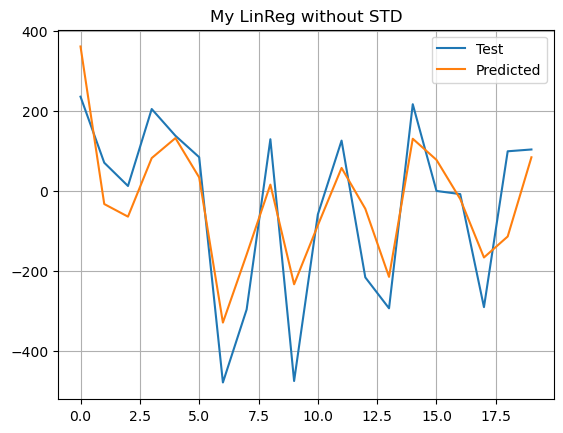

In [14]:
plt.figure()
plt.grid()
plt.plot(y_test, label = 'Test')
plt.plot(y_pred, label = 'Predicted')
plt.title(label='My LinReg without STD')
plt.legend()
plt.show()

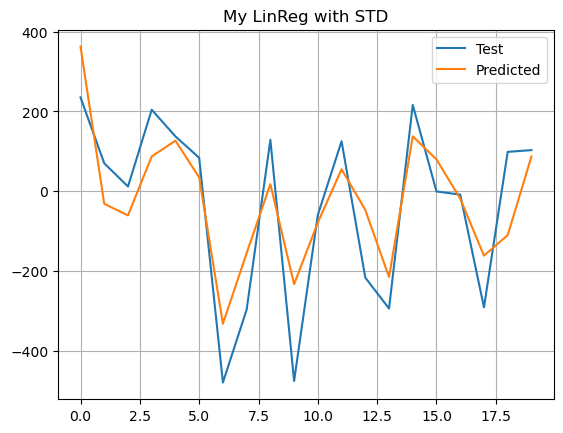

In [15]:
plt.figure()
plt.grid()
plt.plot(y_test, label = 'Test')
plt.plot(y_pred2, label = 'Predicted')
plt.title(label='My LinReg with STD')
plt.legend()
plt.show()

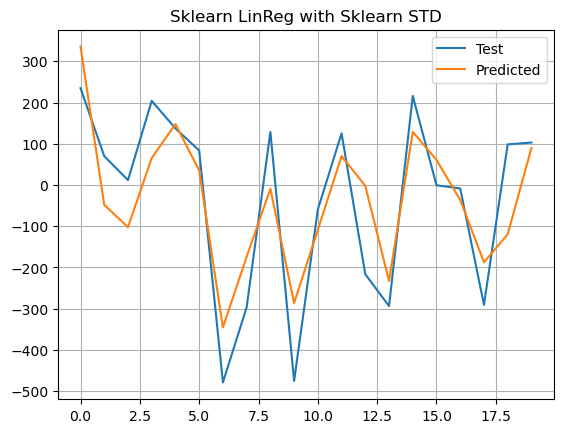

In [16]:
plt.figure()
plt.grid()
plt.plot(y_test, label = 'Test')
plt.plot(y_pred3, label = 'Predicted')
plt.title(label='Sklearn LinReg with Sklearn STD')
plt.legend()
plt.show()

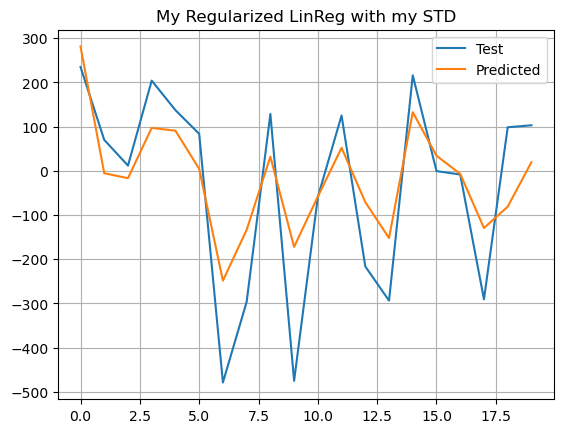

In [17]:
plt.figure()
plt.grid()
plt.plot(y_test, label = 'Test')
plt.plot(y_pred4, label = 'Predicted')
plt.title(label = 'My Regularized LinReg with my STD')
plt.legend()
plt.show()

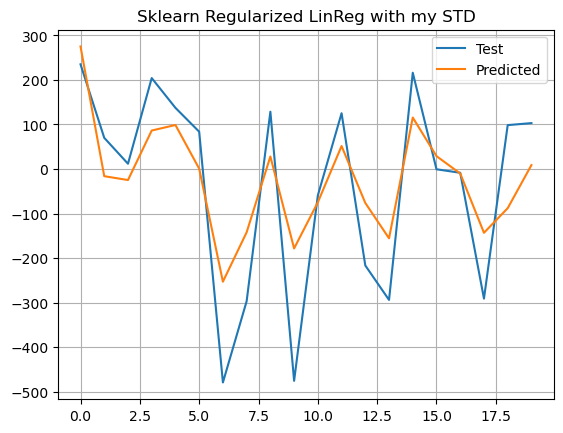

In [18]:
plt.figure()
plt.grid()
plt.plot(y_test, label = 'Test')
plt.plot(y_pred5, label = 'Predicted')
plt.title(label='Sklearn Regularized LinReg with my STD')
plt.legend()
plt.show()

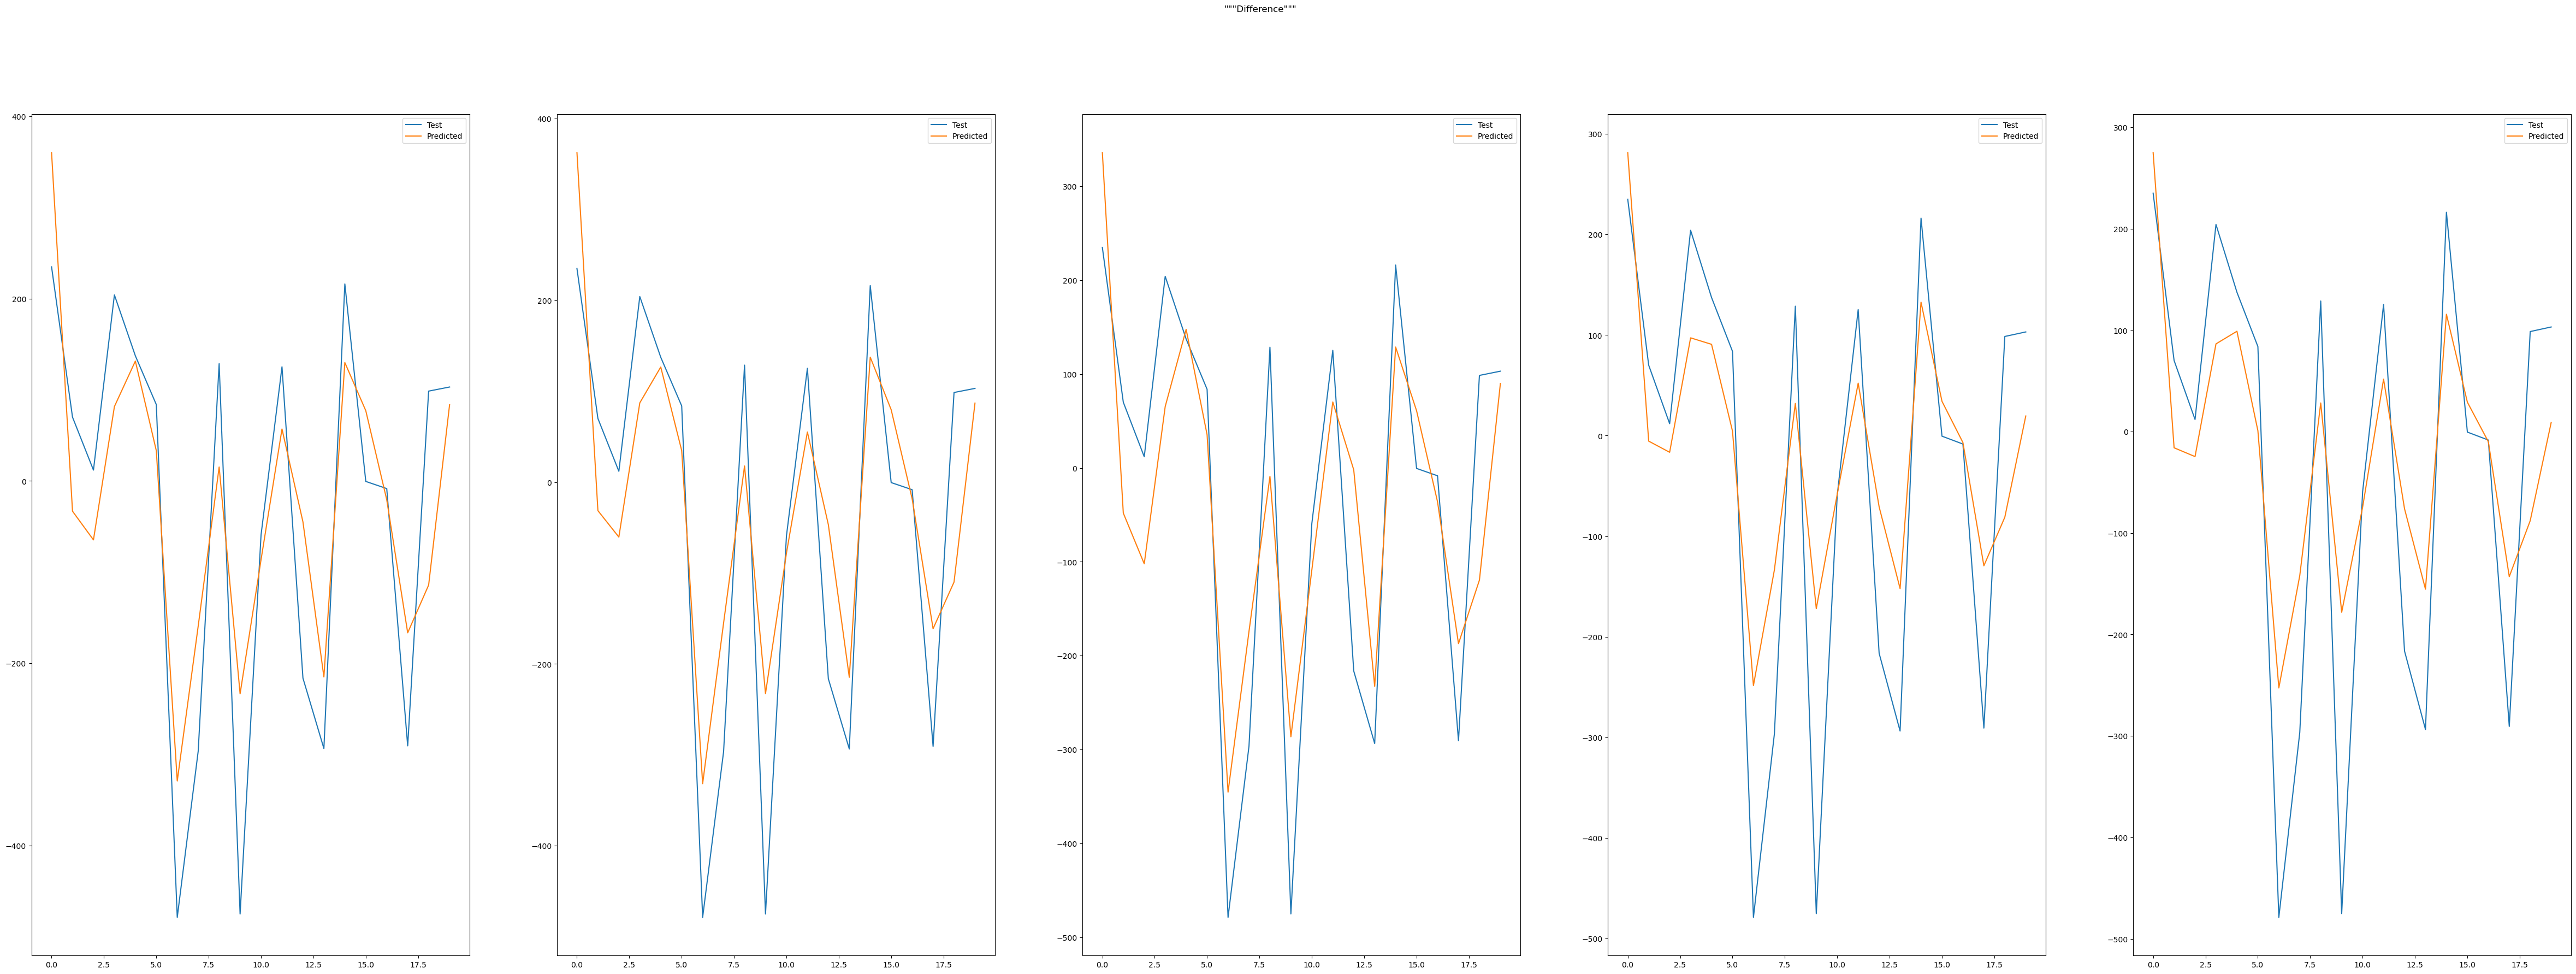

In [24]:
fig,axs = plt.subplots(nrows = 1, ncols = 5)
plt.rcParams ['figure.figsize'] = [60, 20]
fig.suptitle('Difference')

axs[0].plot(y_test, label = 'Test')
axs[0].plot(y_pred, label = 'Predicted')
axs[0].legend()
axs[1].plot(y_test, label = 'Test') 
axs[1].plot(y_pred2, label = 'Predicted')
axs[1].legend()
axs[2].plot(y_test, label = 'Test')
axs[2].plot(y_pred3, label = 'Predicted')
axs[2].legend()
axs[3].plot(y_test, label = 'Test')
axs[3].plot(y_pred4, label = 'Predicted')
axs[3].legend()
axs[4].plot(y_test, label = 'Test')
axs[4].plot(y_pred5, label = 'Predicted')
axs[4].legend()

# Реальный датасет

In [ ]:
data = pd.read_csv("../Data_PW/tested.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


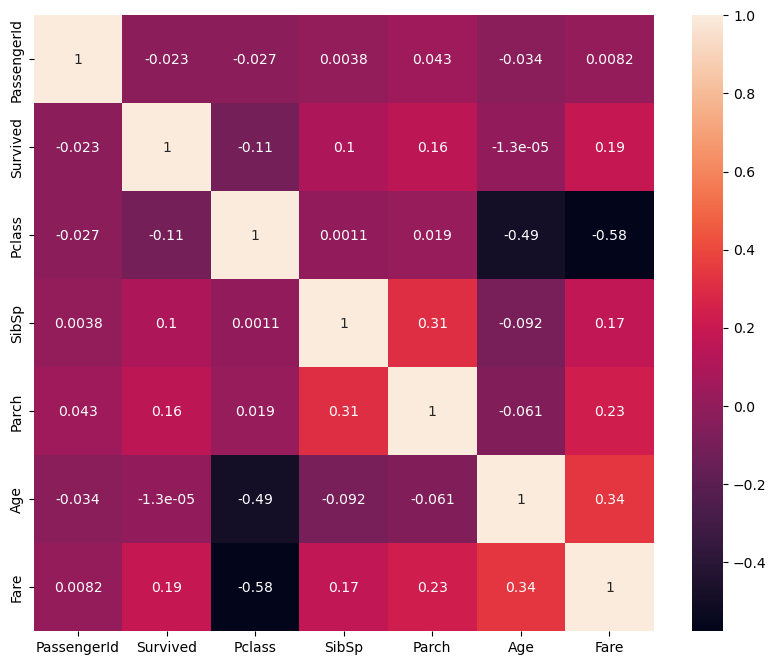

In [ ]:
pt.correlation_heatmap(data=data, sides=(10,8), px=100, annot_size=10, only_numeric=True)